# Neural Networks from Scratch
* We'll implement a simple Neural Network from scratch
* We'll use it to predict House Prices (So we'll use this ANN for Linear
Regression tasks)


## Step 1: Defining our Activation Function
* We'll define the sigmoid function and it's derivative

In [31]:
import numpy as np
import sympy as smp

# Defining the sigmoid function
def sigmoid(z):
    func = 1.0/ (1 + np.exp(-z))
    return func

# using sympy to find the sigmoid's function derivative
x_sym = smp.symbols("x")
sig_func = 1/(1 + smp.exp(-x_sym))
print(smp.diff(sig_func, x_sym))



exp(-x)/(1 + exp(-x))**2


In [32]:
# Now we define the derivative of the sigmoud function
def sigmoid_derivative(z):
    func = np.exp(-z)/(1 + np.exp(-z))**2
    return func


## Step 2: Defining the Training function
* The function takes the training dataset
* It also takes the number of units in the hidden layer (We will only use one
 hiddel layer)
 * We specify a learning rate.
 * A final parameter is the number of iterations

In [33]:
def train(X, y, n_hidden, learning_rate, n_iter):
    """
    This function trains a two-layer neural network with a single hidden layer.
    It uses backpropagation and gradient descent to update the weights and biases for minimizing the loss.

    Parameters:
    X (np.array): Input data with shape (m, n_input), where m is the number of samples and n_input is the number of input features.
    y (np.array): Target labels with shape (m, 1), where m is the number of samples.
    n_hidden (int): The number of neurons in the hidden layer.
    learning_rate (float): The learning rate used in the gradient descent optimization.
    n_iter (int): The number of iterations to train the neural network.

    Returns:
    model (dict): A dictionary containing the trained weights and biases.
    """
    # Get the number of samples (m) and input features (n_input)
    m, n_input = X.shape

    # Initialize weights and biases for the first layer
    W1 = np.random.rand(n_input, n_hidden)
    b1 = np.zeros((1, n_hidden))

    # Initialize weights and biases for the second layer
    W2 = np.random.rand(n_hidden, 1)
    b2 = np.zeros((1, 1))

    # Iterate n_iter times
    for i in range(1, n_iter+1):
        # Forward pass
        Z2 = np.matmul(X, W1) + b1
        A2 = sigmoid(Z2)
        Z3 = np.matmul(A2, W2) + b2
        # Since there's no activation function in the output layer
        A3 = Z3

        # Backpropagation
        dZ3 = A3 - y
        dW2 = np.matmul(A2.T, dZ3)
        db2 = np.sum(dZ3, axis = 0, keepdims = True)
        dZ2 = np.matmul(dZ3, W2.T) * sigmoid_derivative(Z2)
        dW1 = np.matmul(X.T, dZ2)
        db1 = np.sum(dZ2, axis = 0)

        # Update weights and biases using gradient descent
        W2 = W2 - learning_rate * dW2/m
        b2 = b2 - learning_rate * db2/m
        W1 = W1 - learning_rate * dW1/m
        b1 = b1 - learning_rate * db1/m

        # Print the training loss every 100 iterations
        if i % 100 == 0:
            cost = np.mean((y - A3)**2)
            print(f"Iteration {i}, training loss: {cost}")

    # Save the trained weights and biases in a dictionary
    model = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return model

## Step 3: Testing the model
* We'll use the House Prices as the toy dataset.
* Normalization is recommended whenever gradient descent is used so we'll
standarize the input data by removing the mean and scaling to unit variance

In [34]:
from sklearn import preprocessing
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()

# The last 10 samples will be the testing set
num_test = 10

scaler = preprocessing.StandardScaler()
# Splitting into training and testing set and scaling
X_train = california_housing.data[:-num_test, :]
X_train = scaler.fit_transform(X_train)
y_train = california_housing.target[:-num_test].reshape(-1, 1)

X_test = california_housing.data[-num_test:, :]
X_test = scaler.transform(X_test)
y_test = california_housing.target[-num_test:]


In [35]:
# Training a one-layer neural network with 20 hidden units, a 0.1 learning
# rate and 2000 iterations
n_hidden = 20
learning_rate = 0.1
n_iter = 2000

model = train(X_train, y_train, n_hidden, learning_rate, n_iter)
model

Iteration 100, training loss: 0.8326770335213232
Iteration 200, training loss: 0.646194606194786
Iteration 300, training loss: 0.5626440106192254
Iteration 400, training loss: 0.5291424707115796
Iteration 500, training loss: 0.5097343722338752
Iteration 600, training loss: 0.4964002847759407
Iteration 700, training loss: 0.48665018372331453
Iteration 800, training loss: 0.4791341937428031
Iteration 900, training loss: 0.47300172105613597
Iteration 1000, training loss: 0.4677111348127634
Iteration 1100, training loss: 0.4631606165834582
Iteration 1200, training loss: 0.45905652801296976
Iteration 1300, training loss: 0.4552836753629237
Iteration 1400, training loss: 0.4517853524453503
Iteration 1500, training loss: 0.44851988338337645
Iteration 1600, training loss: 0.4454506475076498
Iteration 1700, training loss: 0.4426427628719209
Iteration 1800, training loss: 0.4400978668881586
Iteration 1900, training loss: 0.4377164753779619
Iteration 2000, training loss: 0.43545601619042307


{'W1': array([[ 0.91791209,  0.85794358,  0.22395132,  1.0130058 ,  0.58196243,
          0.86382661,  0.62015628,  0.74815563, -0.17019277, -0.33100775,
          0.31917293,  0.69703415,  0.75308637,  0.75611273,  0.35427996,
          0.24820128,  0.20343396,  0.97959346,  0.52198129,  1.0790349 ],
        [ 0.43551962,  0.66606975,  0.93271709,  0.75383835,  0.35386508,
          0.55033438,  0.29156397,  0.40384243,  0.75255152,  0.42213532,
          0.39141393,  0.00432279,  0.48327733,  0.90924014,  0.06188888,
          0.92526881,  0.12138219,  0.45232066,  0.02118381,  0.96580349],
        [ 0.17074358,  0.14802056,  0.4405542 ,  0.02599542,  0.87075739,
          0.54582205,  0.18218422, -0.61904804,  0.22597102,  0.38236915,
          0.35105798,  0.74008504, -0.01221016,  0.52323628,  0.81981755,
          0.56129646,  0.2613668 ,  0.73867081, -0.02527429,  0.79246574],
        [ 0.08888847,  1.15690733, -0.01870832,  0.11391841,  0.34375303,
          1.12467681,  0.3247

## Final step: Predicting and evaluating
* First we'll define a prediction function
* We'll then evaluate the model using the MSE, MAE and R2 metrics

In [36]:
def predict(X, model):
    """
    A function that predicts new values based on a dataset of new features X
    and a trained model
    @param X: dataset (array) of features m, n_features
    @param model: dict (A dictionary of weights and biases)
    @return: float: Predicted values from features X
    """

    W1 = model["W1"]
    b1 = model["b1"]
    W2 = model["W2"]
    b2 = model["b2"]

    A2 = sigmoid(np.matmul(X, W1) + b1)
    A3 = np.matmul(A2, W2) + b2
    return A3



In [37]:
# Applying the training model to our testing set
predictions = predict(X_test, model)

# Printing out the predictions and their ground truths to compare them
print(predictions)
print(y_test)

[[1.01062431]
 [0.9734597 ]
 [0.85533033]
 [0.67993292]
 [1.06097609]
 [0.25598338]
 [0.79000326]
 [0.44220662]
 [0.61105219]
 [0.63452334]]
[1.12  1.072 1.156 0.983 1.168 0.781 0.771 0.923 0.847 0.894]


In [40]:
# Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 score: {r2}")



Mean Absolute Error: 0.243891437006293
Mean Squared Error: 0.08455445992364088
R2 score: -3.118851455095241


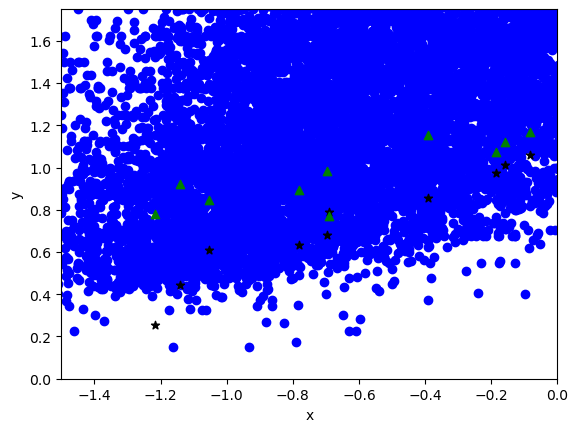

In [49]:
# Visualizing predicted vs true values
import matplotlib.pyplot as plt

# Plotting both the train values and the new predicted values
plt.scatter(X_train[:, 0], y_train, marker = "o", c = "b")
plt.scatter(X_test[:, 0], predictions, marker = "*", c = "k")
plt.scatter(X_test[:, 0], y_test, marker = "^", c = "g")

plt.xlim(-1.5, 0)
plt.ylim(0, 1.75)

plt.xlabel("x")
plt.ylabel("y")

plt.show()